In [1]:
from gatenlp import Document
from gatenlp.corpora import ListCorpus
from GatenlpUtils import loadCorpus, create_gold_standard_json

In [ ]:
from gatenlp.visualization import CorpusViewer

corpus = loadCorpus()
viewer = CorpusViewer(corpus)
viewer.show()

In [ ]:
create_gold_standard_json()

In [14]:
from spacy.lang.en import English
from spacy.tokenizer import Tokenizer

nlp = English()
tokenizer = Tokenizer(nlp.vocab)

for doc in corpus:
    print(f"Processing document: {doc.features.get("gate.SourceURL")}")
    annotations = doc.annset("Section")
    # Procedure
    procedure_annotations = annotations.with_type("Procedure")
    for ann in procedure_annotations:
        procedure_text = doc.text[ann.start:ann.end]
        proc_tokens = tokenizer(procedure_text)
    # Circumstances
    circumstances_annotations = annotations.with_type("Circumstances")
    for ann in circumstances_annotations:
        procedure_text = doc.text[ann.start:ann.end]
        circ_tokens = tokenizer(procedure_text)
    # Decision
    decision_annotations = annotations.with_type("Decision")
    for ann in decision_annotations:
        procedure_text = doc.text[ann.start:ann.end]
        dec_tokens = tokenizer(procedure_text)
    
    total_tokens = len(proc_tokens) + len(circ_tokens) + len(dec_tokens)

    print(f"Procedure tokens: {len(proc_tokens)}")
    print(f"Circumstances tokens: {len(circ_tokens)}")
    print(f"Decision tokens: {len(dec_tokens)}")
    print(f"Total tokens: {total_tokens}")


Processing document: file:/C:/Users/mnavas/CASE%20OF%20ALTAY%20v.%20TURKEY%20(No.%202).docx
Procedure tokens: 168
Circumstances tokens: 1397
Decision tokens: 210
Total tokens: 1775
Processing document: file:/C:/Users/mnavas/CASE%20OF%20BELYAYEV%20AND%20OTHERS%20v.%20UKRAINE.docx
Procedure tokens: 274
Circumstances tokens: 883
Decision tokens: 217
Total tokens: 1374
Processing document: file:/C:/Users/mnavas/CASE%20OF%20BIGUN%20v.%20UKRAINE.docx
Procedure tokens: 121
Circumstances tokens: 1412
Decision tokens: 225
Total tokens: 1758
Processing document: file:/C:/Users/mnavas/CASE%20OF%20CABUCAK%20v.%20GERMANY.docx
Procedure tokens: 177
Circumstances tokens: 2749
Decision tokens: 22
Total tokens: 2948
Processing document: file:/C:/Users/mnavas/CASE%20OF%20CAN%20v.%20TURKEY.docx
Procedure tokens: 134
Circumstances tokens: 506
Decision tokens: 145
Total tokens: 785
Processing document: file:/C:/Users/mnavas/CASE%20OF%20CRISTIAN%20CATALIN%20UNGUREANU%20v.%20ROMANIA.docx
Procedure tokens: 13

C:\Users\z0046bhj\AppData\Local\Temp\ipykernel_26580\3485300595.py:43: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


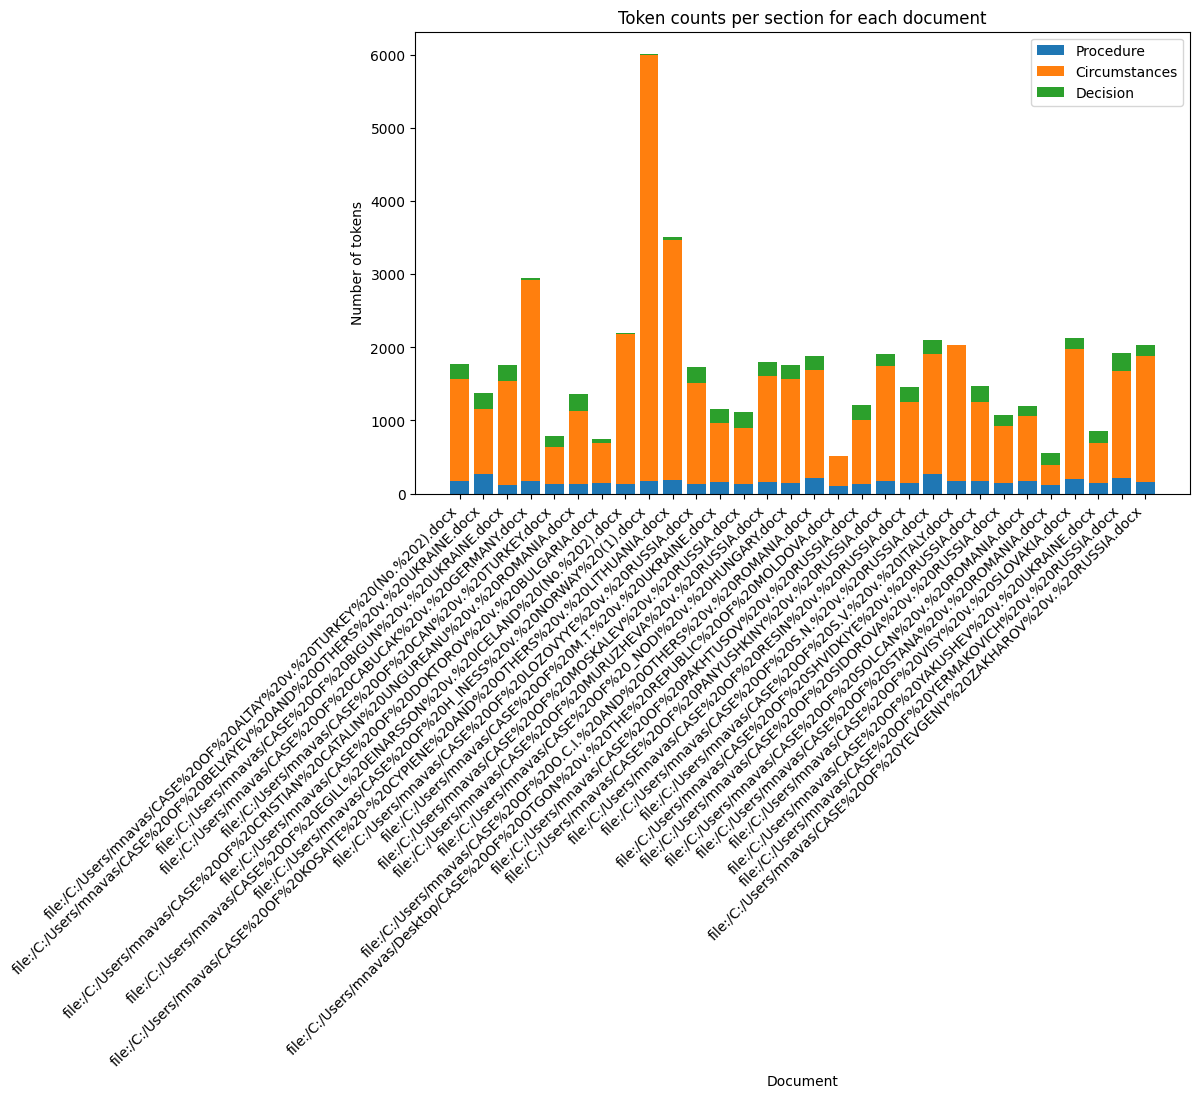

In [15]:
import matplotlib.pyplot as plt

doc_names = []
proc_counts = []
circ_counts = []
dec_counts = []

for doc in corpus:
    doc_name = doc.features.get("gate.SourceURL", "doc")
    doc_names.append(doc_name)
    annotations = doc.annset("Section")
    # Procedure
    proc_tokens = 0
    for ann in annotations.with_type("Procedure"):
        procedure_text = doc.text[ann.start:ann.end]
        proc_tokens += len(tokenizer(procedure_text))
    # Circumstances
    circ_tokens = 0
    for ann in annotations.with_type("Circumstances"):
        procedure_text = doc.text[ann.start:ann.end]
        circ_tokens += len(tokenizer(procedure_text))
    # Decision
    dec_tokens = 0
    for ann in annotations.with_type("Decision"):
        procedure_text = doc.text[ann.start:ann.end]
        dec_tokens += len(tokenizer(procedure_text))
    proc_counts.append(proc_tokens)
    circ_counts.append(circ_tokens)
    dec_counts.append(dec_tokens)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(doc_names, proc_counts, label='Procedure')
bar2 = ax.bar(doc_names, circ_counts, bottom=proc_counts, label='Circumstances')
bottoms = [p + c for p, c in zip(proc_counts, circ_counts)]
bar3 = ax.bar(doc_names, dec_counts, bottom=bottoms, label='Decision')

ax.set_ylabel('Number of tokens')
ax.set_xlabel('Document')
ax.set_title('Token counts per section for each document')
ax.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [16]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Bar(
    name='Procedure',
    x=doc_names,
    y=proc_counts
))
fig.add_trace(go.Bar(
    name='Circumstances',
    x=doc_names,
    y=circ_counts
))
fig.add_trace(go.Bar(
    name='Decision',
    x=doc_names,
    y=dec_counts
))

fig.update_layout(
    barmode='stack',
    title='Token counts per section for each document',
    xaxis_title='Document',
    yaxis_title='Number of tokens',
    xaxis_tickangle=-45,
    legend_title='Section',
    height=600,
    width=1000
)

fig.show()